# Data preparation and exploration

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [3]:
data = pd.read_csv("diabetes.csv")

In [4]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
data['id'] = [i for i in range(len(data))]

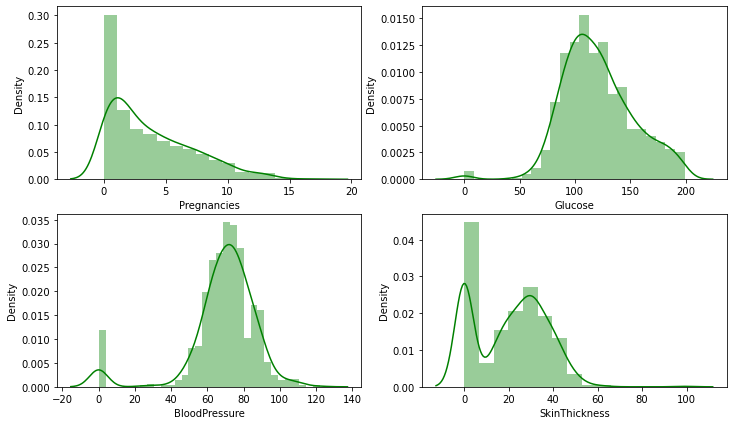

In [6]:
fig, grid = plt.subplots(nrows=2, ncols=2, figsize=(12,7))

g0 = sns.distplot(data['Pregnancies'], ax=grid[0][0], color="g")
g1 = sns.distplot(data['Glucose'], ax=grid[0][1], color="g")
g2 = sns.distplot(data['BloodPressure'], ax=grid[1][0], color="g")
g3 = sns.distplot(data['SkinThickness'], ax=grid[1][1], color="g")

plt.show()

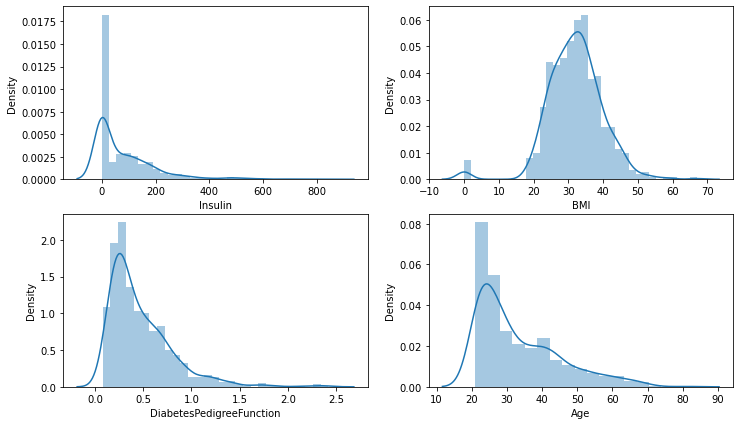

In [7]:
fig, grid = plt.subplots(nrows=2, ncols=2, figsize=(12,7))

g4 = sns.distplot(data['Insulin'], ax=grid[0][0])
g5 = sns.distplot(data['BMI'], ax=grid[0][1])
g6 = sns.distplot(data['DiabetesPedigreeFunction'], ax=grid[1][0])
g7 = sns.distplot(data['Age'], ax=grid[1][1])

plt.show()

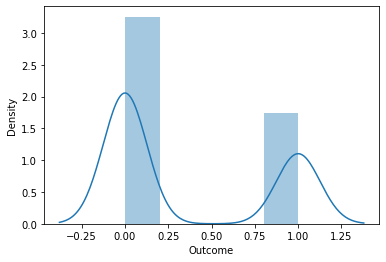

In [8]:
sns.distplot(data.Outcome)
plt.show()

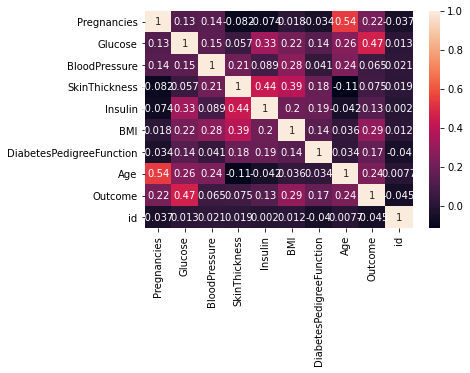

In [27]:
sns.heatmap(data.corr(), annot=True)
plt.show()

In [42]:
def categorize_bmi(value:int) -> list:
    if value < 18.5: return 0
    elif 18.5 <= value <= 24.9: return 1
    elif 25 <= value <= 29.9: return 2
    elif 30 <= value <= 34.9: return 3
    elif 35 <= value <= 39.9: return 4
    elif 40 <= value : return 5

In [43]:
data['Categorized_BMI'] = data['BMI'].apply(categorize_bmi)

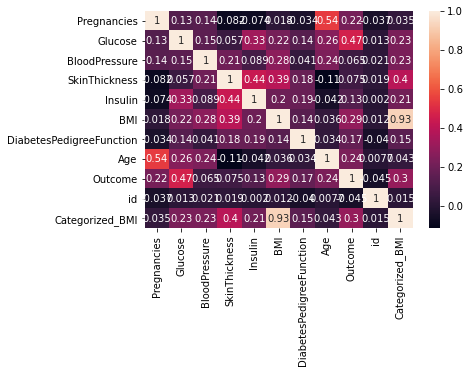

In [45]:
sns.heatmap(data.corr(), annot=True)
plt.show()

In [12]:
column_variences = {}

for column in tuple(data.columns)[:-2]:
    column_variences[column] = np.var(data[column])

In [13]:
column_variences

{'Pregnancies': 11.33927239312061,
 'Glucose': 1020.9172617594401,
 'BloodPressure': 374.1594492594401,
 'SkinThickness': 254.14189995659854,
 'Insulin': 13263.886874728778,
 'BMI': 62.0790464782714,
 'DiabetesPedigreeFunction': 0.10963569693840873,
 'Age': 138.12296379937058}

In [18]:
column_to_varience = pd.DataFrame(columns=['Column', 'Varience'], data=list(column_variences.items()))

In [19]:
column_to_varience

,Column,Varience
0,Pregnancies,11.339272
1,Glucose,1020.917262
2,BloodPressure,374.159449
3,SkinThickness,254.141900
4,Insulin,13263.886875
5,BMI,62.079046
6,DiabetesPedigreeFunction,0.109636
7,Age,138.122964


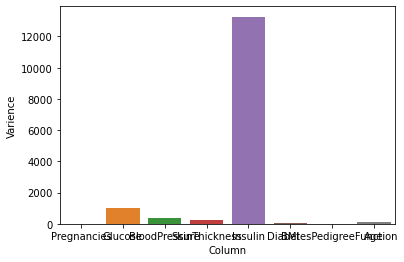

In [28]:
sns.barplot(data=column_to_varience, x='Column', y='Varience');

# Model preparation and fitting

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from catboost import CatBoostClassifier

In [34]:
model = LogisticRegression()

In [35]:
labels = data['Outcome']
train_data = data.drop(['Outcome', 'id'], axis=1)

In [36]:
model.fit(train_data, labels)

LogisticRegression()

In [38]:
recall_score(model.predict(train_data), labels)

0.7439613526570048

In [39]:
model = CatBoostClassifier(depth=5)

In [40]:
model.fit(train_data, labels)

Learning rate set to 0.009204
0:	learn: 0.6885778	total: 1.14ms	remaining: 1.14s
1:	learn: 0.6838278	total: 2.46ms	remaining: 1.23s
2:	learn: 0.6792504	total: 3.73ms	remaining: 1.24s
3:	learn: 0.6762946	total: 5.03ms	remaining: 1.25s
4:	learn: 0.6719191	total: 6.22ms	remaining: 1.24s
5:	learn: 0.6687098	total: 7.4ms	remaining: 1.23s
6:	learn: 0.6642954	total: 8.44ms	remaining: 1.2s
7:	learn: 0.6598505	total: 9.65ms	remaining: 1.2s
8:	learn: 0.6547500	total: 10.7ms	remaining: 1.17s
9:	learn: 0.6512672	total: 11.7ms	remaining: 1.16s
10:	learn: 0.6482408	total: 12.8ms	remaining: 1.15s
11:	learn: 0.6440283	total: 13.9ms	remaining: 1.14s
12:	learn: 0.6395667	total: 15.2ms	remaining: 1.15s
13:	learn: 0.6359244	total: 16.8ms	remaining: 1.18s
14:	learn: 0.6316279	total: 17.9ms	remaining: 1.17s
15:	learn: 0.6280629	total: 19.1ms	remaining: 1.18s
16:	learn: 0.6256119	total: 20.8ms	remaining: 1.2s
17:	learn: 0.6217831	total: 22.4ms	remaining: 1.22s
18:	learn: 0.6186234	total: 23.9ms	remaining: 1.

204:	learn: 0.4221888	total: 177ms	remaining: 685ms
205:	learn: 0.4217049	total: 178ms	remaining: 684ms
206:	learn: 0.4212553	total: 179ms	remaining: 684ms
207:	learn: 0.4204901	total: 179ms	remaining: 683ms
208:	learn: 0.4199832	total: 180ms	remaining: 682ms
209:	learn: 0.4197546	total: 181ms	remaining: 681ms
210:	learn: 0.4195629	total: 182ms	remaining: 680ms
211:	learn: 0.4190367	total: 183ms	remaining: 679ms
212:	learn: 0.4186818	total: 184ms	remaining: 678ms
213:	learn: 0.4183546	total: 184ms	remaining: 677ms
214:	learn: 0.4180047	total: 185ms	remaining: 676ms
215:	learn: 0.4176959	total: 186ms	remaining: 675ms
216:	learn: 0.4174529	total: 187ms	remaining: 674ms
217:	learn: 0.4169643	total: 188ms	remaining: 674ms
218:	learn: 0.4165938	total: 189ms	remaining: 673ms
219:	learn: 0.4162776	total: 190ms	remaining: 673ms
220:	learn: 0.4160313	total: 191ms	remaining: 672ms
221:	learn: 0.4156109	total: 191ms	remaining: 671ms
222:	learn: 0.4152526	total: 192ms	remaining: 670ms
223:	learn: 

408:	learn: 0.3671657	total: 355ms	remaining: 513ms
409:	learn: 0.3670669	total: 356ms	remaining: 512ms
410:	learn: 0.3668716	total: 357ms	remaining: 511ms
411:	learn: 0.3665983	total: 358ms	remaining: 510ms
412:	learn: 0.3664539	total: 358ms	remaining: 509ms
413:	learn: 0.3661104	total: 359ms	remaining: 509ms
414:	learn: 0.3660095	total: 360ms	remaining: 508ms
415:	learn: 0.3657678	total: 361ms	remaining: 507ms
416:	learn: 0.3657069	total: 362ms	remaining: 506ms
417:	learn: 0.3654811	total: 363ms	remaining: 505ms
418:	learn: 0.3652819	total: 363ms	remaining: 504ms
419:	learn: 0.3651174	total: 364ms	remaining: 503ms
420:	learn: 0.3649897	total: 365ms	remaining: 502ms
421:	learn: 0.3647615	total: 366ms	remaining: 501ms
422:	learn: 0.3646596	total: 367ms	remaining: 500ms
423:	learn: 0.3642358	total: 368ms	remaining: 500ms
424:	learn: 0.3640831	total: 369ms	remaining: 499ms
425:	learn: 0.3638675	total: 370ms	remaining: 498ms
426:	learn: 0.3636758	total: 370ms	remaining: 497ms
427:	learn: 

612:	learn: 0.3314568	total: 533ms	remaining: 336ms
613:	learn: 0.3312295	total: 534ms	remaining: 336ms
614:	learn: 0.3310071	total: 535ms	remaining: 335ms
615:	learn: 0.3306618	total: 536ms	remaining: 334ms
616:	learn: 0.3305813	total: 537ms	remaining: 333ms
617:	learn: 0.3304373	total: 538ms	remaining: 332ms
618:	learn: 0.3302454	total: 539ms	remaining: 332ms
619:	learn: 0.3301612	total: 540ms	remaining: 331ms
620:	learn: 0.3299876	total: 541ms	remaining: 330ms
621:	learn: 0.3297868	total: 542ms	remaining: 329ms
622:	learn: 0.3296054	total: 543ms	remaining: 328ms
623:	learn: 0.3292990	total: 544ms	remaining: 328ms
624:	learn: 0.3292427	total: 545ms	remaining: 327ms
625:	learn: 0.3291468	total: 546ms	remaining: 326ms
626:	learn: 0.3288963	total: 547ms	remaining: 326ms
627:	learn: 0.3287063	total: 548ms	remaining: 325ms
628:	learn: 0.3286341	total: 549ms	remaining: 324ms
629:	learn: 0.3285031	total: 550ms	remaining: 323ms
630:	learn: 0.3283396	total: 551ms	remaining: 322ms
631:	learn: 

802:	learn: 0.3010682	total: 711ms	remaining: 174ms
803:	learn: 0.3010022	total: 712ms	remaining: 174ms
804:	learn: 0.3009407	total: 713ms	remaining: 173ms
805:	learn: 0.3007972	total: 714ms	remaining: 172ms
806:	learn: 0.3007367	total: 715ms	remaining: 171ms
807:	learn: 0.3005757	total: 716ms	remaining: 170ms
808:	learn: 0.3003387	total: 717ms	remaining: 169ms
809:	learn: 0.3002041	total: 718ms	remaining: 168ms
810:	learn: 0.2999347	total: 719ms	remaining: 167ms
811:	learn: 0.2998155	total: 719ms	remaining: 167ms
812:	learn: 0.2997048	total: 721ms	remaining: 166ms
813:	learn: 0.2996020	total: 722ms	remaining: 165ms
814:	learn: 0.2995638	total: 723ms	remaining: 164ms
815:	learn: 0.2994710	total: 724ms	remaining: 163ms
816:	learn: 0.2993799	total: 724ms	remaining: 162ms
817:	learn: 0.2991474	total: 726ms	remaining: 161ms
818:	learn: 0.2990797	total: 726ms	remaining: 161ms
819:	learn: 0.2990133	total: 727ms	remaining: 160ms
820:	learn: 0.2989558	total: 728ms	remaining: 159ms
821:	learn: 

In [41]:
recall_score(model.predict(train_data), labels)

0.9396551724137931